In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from datetime import datetime
import optuna
import matplotlib.pyplot as plt
import pandas as pd
import time


In [3]:
dataset_name = 'finalDF-102'
data = pd.read_csv(dataset_name+'.csv')
col_class = 'match_winner'
k_folds = 5
random_state = 8

In [4]:
df_treino, df_teste = train_test_split(data, test_size=0.3, random_state=42, stratify = data[col_class])
df_treino

,Unnamed: 0,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,...,PCA-94,PCA-95,PCA-96,PCA-97,PCA-98,PCA-99,PCA-100,PCA-101,PCA-102,match_winner
3234,3234,-1.641814,-0.739916,0.804740,0.322462,-0.486028,0.663464,-0.517524,0.277041,-0.405795,...,-0.005211,0.099592,0.008477,0.001691,-0.000844,0.002568,0.002527,-3.105689e-16,2.449944e-16,2.0
2863,2863,0.891865,-0.211836,-0.245131,1.130254,0.189379,0.225327,0.658610,-0.597058,-1.221337,...,0.218014,0.002505,0.007057,-0.006356,-0.003035,-0.033769,0.019338,-7.282611e-16,-3.329956e-16,1.0
30586,30586,0.978509,0.386268,-0.708069,-0.121202,2.168413,-0.261146,-0.480237,-0.020771,0.252917,...,0.015072,-0.000466,0.018309,-0.008033,0.001054,0.005930,0.001804,-1.068383e-16,-2.139375e-16,2.0
7960,7960,-1.039190,-1.067658,0.059271,-0.409258,0.619414,-0.485128,0.693550,0.904932,-0.841985,...,0.040911,0.000361,0.016272,-0.028903,-0.001047,-0.003066,-0.016093,-4.382732e-16,1.496833e-17,1.0
2511,2511,2.060821,-1.353131,0.345212,-0.249000,-0.043689,-1.404072,-0.078708,-0.005996,0.414017,...,0.041780,0.008399,0.028177,0.001763,-0.003033,-0.047989,0.034433,4.275721e-17,-1.445150e-16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27327,27327,1.246999,-1.516140,-0.568912,-0.517483,0.059792,0.836255,-0.471715,-0.242532,-0.086629,...,-0.048992,0.003119,0.021999,0.000498,0.000032,0.006421,0.000106,4.959723e-16,-7.192323e-17,1.0
2852,2852,-1.073393,0.552728,0.469686,0.627123,0.072298,-0.416445,-0.082780,0.020444,-0.464941,...,0.154252,-0.069405,0.018379,0.001296,-0.000047,0.003752,-0.001920,1.581326e-15,-5.265843e-16,1.0
14159,14159,-1.379051,-1.228089,-0.812458,0.278696,0.615651,-0.599822,0.466989,-0.619788,0.361898,...,-0.002624,-0.006389,0.007279,-0.001857,-0.000902,0.006885,0.001943,1.327541e-16,-3.709639e-16,1.0
17000,17000,-1.574201,0.890834,-0.657243,0.718165,-1.251831,-0.466994,0.293326,-0.497573,0.128668,...,-0.078594,-0.117716,-0.009000,-0.006137,0.001600,-0.008482,-0.002286,3.752919e-16,-2.072028e-16,1.0


In [5]:
df_teste

,Unnamed: 0,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,...,PCA-94,PCA-95,PCA-96,PCA-97,PCA-98,PCA-99,PCA-100,PCA-101,PCA-102,match_winner
14467,14467,1.418413,0.978796,-0.266364,-1.178940,-0.387382,-0.108187,0.042090,0.481584,0.130714,...,0.087248,-0.000061,-0.001233,0.015131,-0.001247,0.001494,-0.005433,-5.993226e-16,-2.787743e-16,2.0
25986,25986,2.062420,-1.549785,0.190493,-0.307068,-0.584165,-0.959547,-0.110670,-0.015705,-0.296406,...,0.002788,0.001468,0.006908,0.024621,-0.001020,0.002309,0.000084,8.408673e-16,3.318399e-17,1.0
2180,2180,-1.045426,1.408331,0.528411,0.209914,-0.344268,-0.195944,-0.467188,-0.004771,-0.031248,...,-0.035882,-0.063485,-0.001663,-0.005977,-0.000031,-0.003448,-0.004853,-2.592044e-15,1.508206e-16,2.0
13418,13418,-1.152693,0.319432,0.442838,-1.118691,-0.353128,-0.502338,-1.061218,0.056350,0.096112,...,-0.138950,-0.002111,-0.007263,0.003557,-0.000329,0.004868,-0.004137,-9.884805e-16,7.015446e-17,1.0
23735,23735,0.019787,-0.807331,-1.535668,0.109234,0.788970,0.520701,0.233481,-0.422755,-0.385774,...,-0.005768,0.007766,-0.008027,0.004190,-0.000186,0.001270,-0.001485,-1.155380e-15,-8.369045e-17,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15292,15292,-1.242128,0.828105,0.295283,0.413452,-0.332971,0.047873,-1.054933,-0.645013,0.806299,...,0.081953,-0.016138,0.007730,0.000027,-0.000668,0.000890,0.000792,1.078313e-15,3.086473e-16,2.0
9839,9839,-0.804142,0.001430,-0.864166,-0.137171,1.270885,-0.681501,0.905364,-0.603368,-0.061160,...,0.015095,0.001499,0.008302,0.004666,0.000704,0.007969,0.004177,-3.865648e-16,-6.729599e-17,2.0
19576,19576,-0.549459,0.327994,-1.258489,-0.340245,0.373276,0.134921,1.158754,0.211916,-0.365651,...,0.021318,0.002739,0.006634,0.003327,-0.001566,-0.002381,0.010684,1.619775e-15,-2.558216e-16,2.0
8109,8109,-0.601008,-0.202322,0.585836,-1.444636,0.121029,1.186344,0.068915,-0.596521,-0.733194,...,-0.047348,0.005094,-0.005526,0.011825,-0.002217,-0.000035,-0.001356,1.214896e-15,1.401249e-16,2.0


In [6]:
class OptimizeRandomForest:
    def __init__(self, x_treino, y_treino, x_teste, y_teste):
        self.x_treino = x_treino
        self.y_treino = y_treino
        self.x_teste = x_teste
        self.y_teste = y_teste
        
        self.arr_methods = []
    
    def model_accuracy(self, method):
        model = method.fit(self.x_treino, self.y_treino)
        y_predict = model.predict(self.x_teste)
        
        return accuracy_score(self.y_teste, y_predict)
        
        
    def __call__(self, trial):
        min_samples_split = trial.suggest_uniform('min_samples_split',0,0.5)
        max_features = trial.suggest_uniform('max_features',0,0.5)
        num_arvores = trial.suggest_int('num_arvores',1,50)
        
        rf_method = RandomForestClassifier(min_samples_split=min_samples_split,max_features=max_features,n_estimators=num_arvores,random_state=random_state)
        self.arr_methods.append(rf_method)
        return self.model_accuracy(rf_method)

In [7]:
skf = StratifiedKFold(n_splits=k_folds)

x_treino = df_treino.drop(col_class,axis=1)
y_treino = df_treino[col_class]

studies_per_fold = []
sampler = optuna.samplers.TPESampler(seed=1, n_startup_trials=10)
best_studies_per_fold = []
time_to_best_params = []
for train_index, validation_index in skf.split(x_treino, y_treino):
    inicio = datetime.now()
    study = optuna.create_study(sampler=sampler, direction="maximize")
    optimizeObj = OptimizeRandomForest(x_treino.iloc[train_index], y_treino.iloc[train_index], x_treino.iloc[validation_index], y_treino.iloc[validation_index])
    study.optimize(optimizeObj, n_trials=60)
    best_method = optimizeObj.arr_methods[study.best_trial.number]
    
    studies_per_fold.append(study)
    
    best_study_per_fold = (study.best_trial, best_method, optimizeObj.model_accuracy(best_method))
    time_to_best_params.append(datetime.now() - inicio)
    
    best_studies_per_fold.append(best_study_per_fold)
best_studies_per_fold

[I 2022-02-07 13:02:14,804] Finished trial#0 with value: 0.7330632455548053 with parameters: {'min_samples_split': 0.208511002351287, 'max_features': 0.36016224672107905, 'num_arvores': 10}. Best is trial#0 with value: 0.7330632455548053.
[I 2022-02-07 13:02:15,598] Finished trial#1 with value: 0.7735764123340085 with parameters: {'min_samples_split': 0.15116628631591988, 'max_features': 0.07337794540855652, 'num_arvores': 17}. Best is trial#1 with value: 0.7735764123340085.
[I 2022-02-07 13:02:16,194] Finished trial#2 with value: 0.7285617825793382 with parameters: {'min_samples_split': 0.19829036364801306, 'max_features': 0.1939553705810037, 'num_arvores': 7}. Best is trial#1 with value: 0.7735764123340085.
[I 2022-02-07 13:02:19,127] Finished trial#3 with value: 0.6993022732388026 with parameters: {'min_samples_split': 0.4677695354030159, 'max_features': 0.42315545834300855, 'num_arvores': 38}. Best is trial#1 with value: 0.7735764123340085.
[I 2022-02-07 13:02:20,506] Finished tria

[I 2022-02-07 13:04:23,950] Finished trial#33 with value: 0.8271438217420661 with parameters: {'min_samples_split': 0.0017214354555291234, 'max_features': 0.11955525294405964, 'num_arvores': 25}. Best is trial#13 with value: 0.8271438217420661.
[I 2022-02-07 13:04:25,205] Finished trial#34 with value: 0.7420661715057394 with parameters: {'min_samples_split': 0.14559454518717269, 'max_features': 0.08021535143237088, 'num_arvores': 25}. Best is trial#13 with value: 0.8271438217420661.
[I 2022-02-07 13:04:29,096] Finished trial#35 with value: 0.784154850326356 with parameters: {'min_samples_split': 0.08572465532415244, 'max_features': 0.17626548995394536, 'num_arvores': 28}. Best is trial#13 with value: 0.8271438217420661.
[I 2022-02-07 13:04:32,357] Finished trial#36 with value: 0.8147647985595319 with parameters: {'min_samples_split': 0.02375791180389754, 'max_features': 0.10362079701588292, 'num_arvores': 25}. Best is trial#13 with value: 0.8271438217420661.
[I 2022-02-07 13:04:33,832]

[I 2022-02-07 13:09:57,238] Finished trial#6 with value: 0.7084646555605583 with parameters: {'min_samples_split': 0.39463966422574426, 'max_features': 0.05161300328882101, 'num_arvores': 41}. Best is trial#4 with value: 0.8169743358847366.
[I 2022-02-07 13:09:57,865] Finished trial#7 with value: 0.755065285907249 with parameters: {'min_samples_split': 0.23461926321907156, 'max_features': 0.04808613022273084, 'num_arvores': 24}. Best is trial#4 with value: 0.8169743358847366.
[I 2022-02-07 13:10:03,519] Finished trial#8 with value: 0.7834308869878434 with parameters: {'min_samples_split': 0.059745233990358415, 'max_features': 0.26239968843522277, 'num_arvores': 20}. Best is trial#4 with value: 0.8169743358847366.
[I 2022-02-07 13:10:04,529] Finished trial#9 with value: 0.7014858171994597 with parameters: {'min_samples_split': 0.45843066726486426, 'max_features': 0.45522419089655075, 'num_arvores': 11}. Best is trial#4 with value: 0.8169743358847366.
[I 2022-02-07 13:10:05,314] Finished

[I 2022-02-07 13:18:30,124] Finished trial#39 with value: 0.7937865826204412 with parameters: {'min_samples_split': 0.03728600817020358, 'max_features': 0.2757804833950634, 'num_arvores': 38}. Best is trial#37 with value: 0.825303917154435.
[I 2022-02-07 13:19:12,662] Finished trial#40 with value: 0.8311571364250337 with parameters: {'min_samples_split': 0.0010990259100721001, 'max_features': 0.3847328377618211, 'num_arvores': 42}. Best is trial#40 with value: 0.8311571364250337.
[I 2022-02-07 13:19:58,345] Finished trial#41 with value: 0.8277802791535345 with parameters: {'min_samples_split': 0.0006011827497871684, 'max_features': 0.3895957071277433, 'num_arvores': 42}. Best is trial#40 with value: 0.8311571364250337.
[I 2022-02-07 13:20:34,887] Finished trial#42 with value: 0.80031517334534 with parameters: {'min_samples_split': 0.025366803083784282, 'max_features': 0.3948350368077916, 'num_arvores': 49}. Best is trial#40 with value: 0.8311571364250337.
[I 2022-02-07 13:20:53,008] Fi

[I 2022-02-07 13:29:23,762] Finished trial#12 with value: 0.8334083746060333 with parameters: {'min_samples_split': 0.001897940819483394, 'max_features': 0.09911534230767986, 'num_arvores': 36}. Best is trial#10 with value: 0.8338586222422333.
[I 2022-02-07 13:29:26,885] Finished trial#13 with value: 0.7832057631697433 with parameters: {'min_samples_split': 0.1000206535608765, 'max_features': 0.1296636371323006, 'num_arvores': 34}. Best is trial#10 with value: 0.8338586222422333.
[I 2022-02-07 13:29:36,412] Finished trial#14 with value: 0.7818550202611436 with parameters: {'min_samples_split': 0.0994441084713425, 'max_features': 0.38586496965584005, 'num_arvores': 31}. Best is trial#10 with value: 0.8338586222422333.
[I 2022-02-07 13:29:37,041] Finished trial#15 with value: 0.7413327330031517 with parameters: {'min_samples_split': 0.16317834670205966, 'max_features': 0.019508962544806885, 'num_arvores': 34}. Best is trial#10 with value: 0.8338586222422333.
[I 2022-02-07 13:29:43,927] F

[I 2022-02-07 13:32:28,229] Finished trial#45 with value: 0.7791535344439442 with parameters: {'min_samples_split': 0.09330511474858301, 'max_features': 0.1916832448855642, 'num_arvores': 43}. Best is trial#41 with value: 0.8376857271499325.
[I 2022-02-07 13:32:34,216] Finished trial#46 with value: 0.8185502026114363 with parameters: {'min_samples_split': 0.042616122219514246, 'max_features': 0.15473711775860455, 'num_arvores': 36}. Best is trial#41 with value: 0.8376857271499325.
[I 2022-02-07 13:32:39,702] Finished trial#47 with value: 0.8250787933363349 with parameters: {'min_samples_split': 0.016317853417851292, 'max_features': 0.10141699274508233, 'num_arvores': 38}. Best is trial#41 with value: 0.8376857271499325.
[I 2022-02-07 13:32:43,639] Finished trial#48 with value: 0.8021161638901396 with parameters: {'min_samples_split': 0.05632259461450514, 'max_features': 0.12050644183585246, 'num_arvores': 33}. Best is trial#41 with value: 0.8376857271499325.
[I 2022-02-07 13:32:45,238]

[I 2022-02-07 13:38:01,471] Finished trial#18 with value: 0.7215218370103557 with parameters: {'min_samples_split': 0.1798383197887412, 'max_features': 0.21567737122488756, 'num_arvores': 42}. Best is trial#12 with value: 0.8275551553354344.
[I 2022-02-07 13:38:13,732] Finished trial#19 with value: 0.8250787933363349 with parameters: {'min_samples_split': 0.005898127310318805, 'max_features': 0.10743985593132041, 'num_arvores': 46}. Best is trial#12 with value: 0.8275551553354344.
[I 2022-02-07 13:38:33,058] Finished trial#20 with value: 0.7854570013507429 with parameters: {'min_samples_split': 0.06006167171734974, 'max_features': 0.3089503651713972, 'num_arvores': 39}. Best is trial#12 with value: 0.8275551553354344.
[I 2022-02-07 13:38:40,837] Finished trial#21 with value: 0.8241782980639352 with parameters: {'min_samples_split': 0.006732959328371263, 'max_features': 0.08259197531340312, 'num_arvores': 46}. Best is trial#12 with value: 0.8275551553354344.
[I 2022-02-07 13:38:50,220] 

[I 2022-02-07 13:44:30,603] Finished trial#51 with value: 0.8176497073390365 with parameters: {'min_samples_split': 0.01949592690934336, 'max_features': 0.20450520361739064, 'num_arvores': 48}. Best is trial#33 with value: 0.8311571364250337.
[I 2022-02-07 13:44:36,215] Finished trial#52 with value: 0.8221521837010356 with parameters: {'min_samples_split': 0.010752282138618313, 'max_features': 0.18673505549006927, 'num_arvores': 15}. Best is trial#33 with value: 0.8311571364250337.
[I 2022-02-07 13:44:44,842] Finished trial#53 with value: 0.830031517334534 with parameters: {'min_samples_split': 0.0029633723714754543, 'max_features': 0.1290013105133968, 'num_arvores': 28}. Best is trial#33 with value: 0.8311571364250337.
[I 2022-02-07 13:44:52,922] Finished trial#54 with value: 0.815173345339937 with parameters: {'min_samples_split': 0.001332264745916257, 'max_features': 0.14260926516798902, 'num_arvores': 23}. Best is trial#33 with value: 0.8311571364250337.
[I 2022-02-07 13:44:55,462]

[I 2022-02-07 13:52:47,774] Finished trial#24 with value: 0.7962629446195407 with parameters: {'min_samples_split': 0.04613320594098268, 'max_features': 0.39754200313131477, 'num_arvores': 31}. Best is trial#23 with value: 0.8390364700585322.
[I 2022-02-07 13:52:57,644] Finished trial#25 with value: 0.7561909049977488 with parameters: {'min_samples_split': 0.10259927634846715, 'max_features': 0.31573575451959446, 'num_arvores': 40}. Best is trial#23 with value: 0.8390364700585322.
[I 2022-02-07 13:53:01,977] Finished trial#26 with value: 0.7266996848266547 with parameters: {'min_samples_split': 0.1888837728349544, 'max_features': 0.44488466499848195, 'num_arvores': 24}. Best is trial#23 with value: 0.8390364700585322.
[I 2022-02-07 13:53:30,102] Finished trial#27 with value: 0.8372354795137326 with parameters: {'min_samples_split': 0.0005887085434919115, 'max_features': 0.3765582053565529, 'num_arvores': 27}. Best is trial#23 with value: 0.8390364700585322.
[I 2022-02-07 13:53:39,461] 

[I 2022-02-07 14:09:16,486] Finished trial#57 with value: 0.8293561458802341 with parameters: {'min_samples_split': 0.01797051291811898, 'max_features': 0.44493477149248073, 'num_arvores': 37}. Best is trial#33 with value: 0.8435389464205313.
[I 2022-02-07 14:09:17,646] Finished trial#58 with value: 0.7516884286357497 with parameters: {'min_samples_split': 0.0002886756563384085, 'max_features': 0.003286203373087243, 'num_arvores': 40}. Best is trial#33 with value: 0.8435389464205313.
[I 2022-02-07 14:09:24,171] Finished trial#59 with value: 0.8226024313372354 with parameters: {'min_samples_split': 0.038041366333355704, 'max_features': 0.15324520958318147, 'num_arvores': 36}. Best is trial#33 with value: 0.8435389464205313.


[(FrozenTrial(number=52, value=0.8338960162052668, datetime_start=datetime.datetime(2022, 2, 7, 13, 7, 7, 740226), datetime_complete=datetime.datetime(2022, 2, 7, 13, 7, 26, 117618), params={'min_samples_split': 0.002301346822703938, 'max_features': 0.20345687317766822, 'num_arvores': 43}, distributions={'min_samples_split': UniformDistribution(high=0.5, low=0), 'max_features': UniformDistribution(high=0.5, low=0), 'num_arvores': IntUniformDistribution(high=50, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=52, state=TrialState.COMPLETE),
  RandomForestClassifier(max_features=0.20345687317766822,
                         min_samples_split=0.002301346822703938, n_estimators=43,
                         random_state=8),
  0.8338960162052668),
 (FrozenTrial(number=40, value=0.8311571364250337, datetime_start=datetime.datetime(2022, 2, 7, 13, 18, 30, 140606), datetime_complete=datetime.datetime(2022, 2, 7, 13, 19, 12, 662385), params={'min_samples_split':

In [8]:
x_teste = df_teste.drop(col_class, axis=1)
y_teste = df_teste[col_class]
optimizeObj = OptimizeRandomForest(x_treino, y_treino, x_teste, y_teste)
best_trial = None
best_result = 0
for best_trials, best_method, resultado in best_studies_per_fold:
    print("Resultado do treino: ", resultado)
    aux_result = optimizeObj.model_accuracy(best_method)
    print("Resultado do teste: ", aux_result)
    if(aux_result > best_result):
        best_result = aux_result
        best_trial = best_trials
    
    print("-------------------------")

Resultado do treino:  0.8338960162052668
Resultado do teste:  0.8315999579787793
-------------------------
Resultado do treino:  0.8311571364250337
Resultado do teste:  0.8288685786322093
-------------------------
Resultado do treino:  0.8376857271499325
Resultado do teste:  0.830024162201912
-------------------------
Resultado do treino:  0.8311571364250337
Resultado do teste:  0.8275028889589242
-------------------------
Resultado do treino:  0.8435389464205313
Resultado do teste:  0.8281332072696712
-------------------------


              precision    recall  f1-score   support

         1.0       0.84      0.85      0.85      5126
         2.0       0.82      0.82      0.82      4393

    accuracy                           0.83      9519
   macro avg       0.83      0.83      0.83      9519
weighted avg       0.83      0.83      0.83      9519



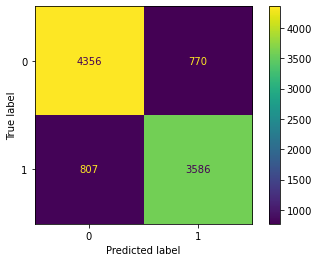

In [9]:
time_to_predict = time.time()
model = RandomForestClassifier(n_estimators=best_trial.params['num_arvores'], min_samples_split=best_trial.params['min_samples_split'], max_features=best_trial.params['max_features'])
model.fit(x_treino, y_treino)
y_pred = model.predict(x_teste)
time_to_predict = time.time() - time_to_predict

with open(f'{dataset_name}_metrics.txt','w') as metric:
    print(classification_report(y_teste, y_pred), file=metric)
    i = 1
    print("----------------------", file=metric)
    print("Tempo por fold para processar melhor parametro:", file=metric)
    for datetime_per_fold in time_to_best_params:
        print(f"Fold {i} time: {datetime_per_fold}", file=metric)
        i+=1
    print("----------------------", file=metric)
    print("Tempo para o metodo processar com os melhores parametros: ", file=metric)
    print(time_to_predict, file=metric)
    print("----------------------", file=metric)
    print("Best params: ", best_trial.params, file=metric)

    

print(classification_report(y_teste, y_pred))

dsp = ConfusionMatrixDisplay(confusion_matrix(y_teste, y_pred))
dsp.plot()
plt.savefig(dataset_name+'_confusion_matrix')
plt.show()
